Hi, David. Given your RA and DEC coordinates, let's go find a light curve of your source, which happens to be a member of the M67 cluster! Maybe we can search for some periodic variability too!

In [1]:
RA=132.65420833333334
DEC=11.901305555555556

Ok, so first you'll need astroquery. If it's not installed, you'll want to install it. There is more information provided at the out the url below.
https://astroquery.readthedocs.io/en/latest/

In [2]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.ned.core import RemoteServiceError
from astropy.table import Table
from IPython.display import Image
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

import pandas as pd

What missions does the astroquery Observations command search through?

In [3]:
print("missions:",Observations.list_missions())

missions: ['BEFS', 'EUVE', 'FUSE', 'GALEX', 'HLA', 'HLSP', 'HST', 'HUT', 'IUE', 'JWST', 'K2', 'K2FFI', 'Kepler', 'KeplerFFI', 'PS1', 'SPITZER_SHA', 'SWIFT', 'TESS', 'TUES', 'WUPPE']


Ok, wow. That is a lot of observations. We want K2 data, which spanned 3 years for M67 sources.  Let's limit our search to a radius of 5 arcseconds. For reference, Kepler/K2 has about 4 arcseconds per pixel.

In [4]:
obs_table = Observations.query_region("132.65420833333334 11.901305555555556",\
                                      radius=5*u.arcsec)
print(obs_table) 

intentType obs_collection provenance_name ...    obsid         distance     
---------- -------------- --------------- ... ----------- ------------------
   science          SWIFT              -- ... 15000733212                0.0
   science          SWIFT              -- ... 15000659258                0.0
   science          SWIFT              -- ... 15000733211                0.0
   science          SWIFT              -- ... 15000733213                0.0
   science          SWIFT              -- ... 15000741279                0.0
   science          SWIFT              -- ... 15000669055                0.0
   science          SWIFT              -- ... 15000741277                0.0
   science          SWIFT              -- ... 15000741278                0.0
   science          SWIFT              -- ... 15000741285                0.0
   science          SWIFT              -- ... 15000730964                0.0
       ...            ...             ... ...         ...                ...

Great, we have 39 observations within our search radius. Many of these correspond to data/missions that are not of interest here. For example, note the SWIFT observations listed above. We can look through specific rows too.

In [5]:
print(obs_table[26:31])

intentType obs_collection provenance_name ... srcDen    obsid    distance
---------- -------------- --------------- ... ------ ----------- --------
   science             K2              K2 ...    nan  9500493012      0.0
   science             K2              K2 ...    nan  9500493013      0.0
   science           HLSP         EVEREST ...    nan 18002410425      0.0
   science           HLSP           K2SFF ...    nan 18001844236      0.0
   science           HLSP           K2SFF ...    nan 18002044926      0.0


We see that just rows 26-31 correspond to Kepler. Rows 26 and 27 are raw K2 data. Row 28 contains EVEREST data --- a transit search that is listed as a high level sciece product (HLSP). Rows 29 and 30 are the K2SFF files. These correspond to K2 Extracted Lightcurves that A. Vanderburg generated. This is what Bob mentioned in our group meeting on July 21st, 2020. The first K2SFF file (18001844236) is from K2 Campaign 5, while the second (18002044926) is for K2 Campaign 16. Remember that K2 observations are broken up into a series of 18 campaigns. Your source was actually observed three times (Campaigns 5, 16, and 18).

Ok, so we have two obsid numbers that we need. Both correspond to the same target, denoted by an EPIC number that you will see in their headers when you download them. Let's download them both. The commands below will automatically save a bunch of files to a subfolder entitled "/mastDownload/HLSP." 

In [6]:
obsid1 = '18001844236'
data_products = Observations.get_product_list(obsid1)
manifest = Observations.download_products(data_products)

INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_correction.png with expected size 11986. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_image.png with expected size 4178. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_medians.png with expected size 4512. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_skypos.png with expected size 7791. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc.png with expected size 38584. [astroquery

In the subfolders are 8 files. The first is a tar.gz file, which can be ignored. 
Let's look at the original photometric data.

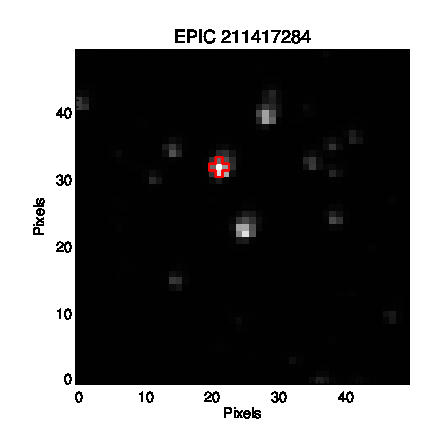

In [7]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_image.png')

We can see where this is situated in the K2 field of view with the following plot.

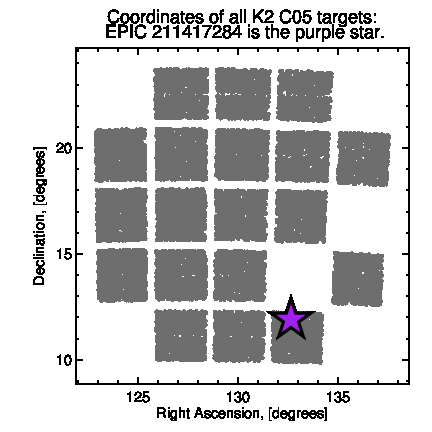

In [8]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_skypos.png')

If you'd like to plot the data yourself, it's contained in the following file: hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc-default-aper.txt --- you can just read in the columns and plot via matplotlib. However, Vanderburg already did this in the next png that we will display from the subfolder.

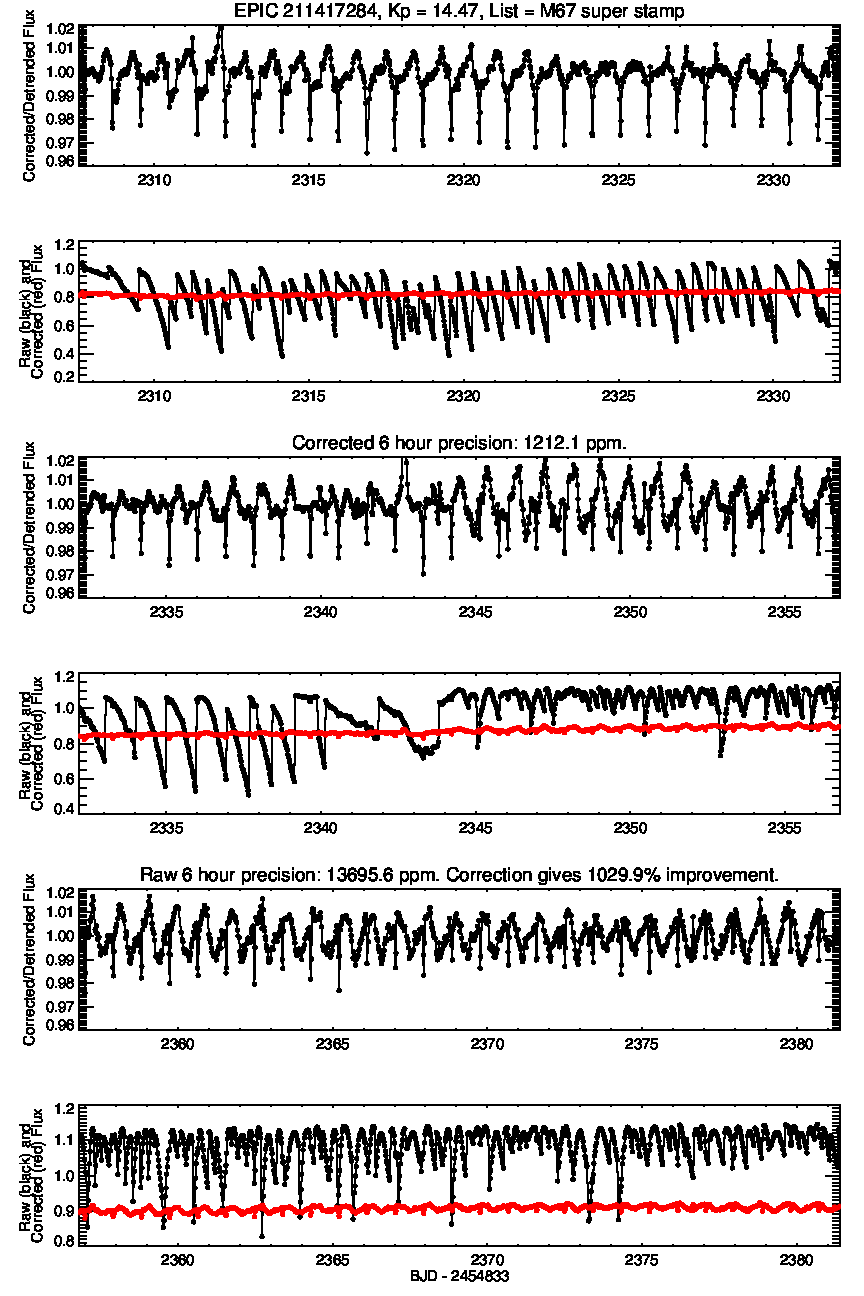

In [9]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc.png')

Below you'll see the median counts for this source over time. This is just a single campaign, btw (campaign 5), and not the entire 3-year window that is available if you string the three campaigns containing M67 together.

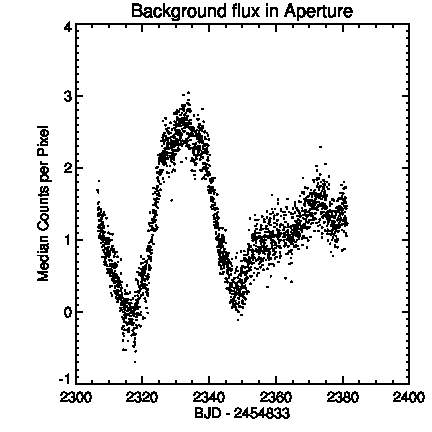

In [10]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_medians.png')

Ok, now let's take a moment to look at campaign 16...

In [11]:
obsid2 = '18002044926'
data_products = Observations.get_product_list(obsid2)
manifest = Observations.download_products(data_products)

INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_correction.png with expected size 27356. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_image.png with expected size 8731. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_medians.png with expected size 6245. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_skypos.png with expected size 9184. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc.png with expected size 59621. [astroquery

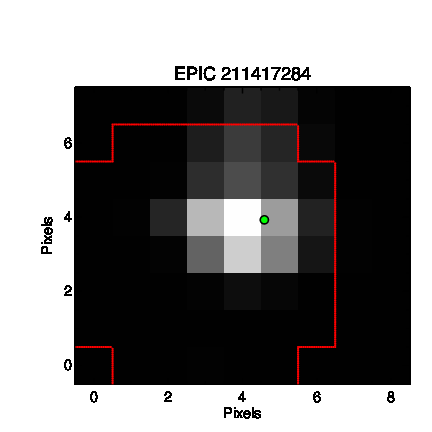

In [12]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_image.png')

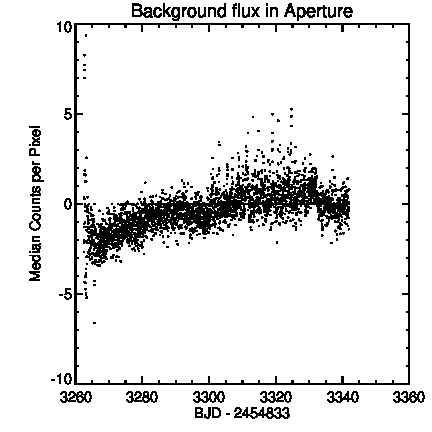

In [13]:
Image(filename='mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_medians.png')

Ok, so that's all cool, but do we actually have a periodic variable here? We'll need to generate a phase-folded periodogram to see that. Ideally, we want to do this for the merged dataset to cover a longer observation window.

My favorite tool to do this is astrobase. You may need to download that using the url below. It's worth it. https://github.com/waqasbhatti/astrobase/blob/master/docs/index.rst

It's literally just a "pip install astrobase" command though...

In [5]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

First let us read in the text files and plot them to make some sense of the data

Text(0, 0.5, 'Flux')

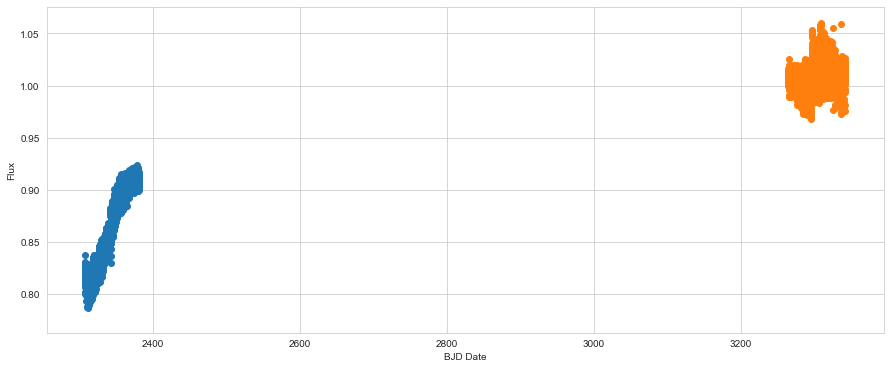

In [6]:
%matplotlib inline 
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
df1 = pd.read_csv('/Users/msoaresfurtado/Desktop/David/mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c05_kepler_v1_llc-default-aper.txt', sep=",",skiprows=1,header=None)
date1=df1[0]
flux1=df1[1]
df2 = pd.read_csv('/Users/msoaresfurtado/Desktop/David/mastDownload/HLSP/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc/hlsp_k2sff_k2_lightcurve_211417284-c16_kepler_v1_llc-default-aper.txt', sep=",",skiprows=1,header=None)
date2=df2[0]
flux2=df2[1]

plt.scatter(date1,flux1)
plt.scatter(date2,flux2)
plt.xlabel('BJD Date')
plt.ylabel('Flux')

Let's just combine the two datasets before we run the periodogram

Text(0, 0.5, 'Flux')

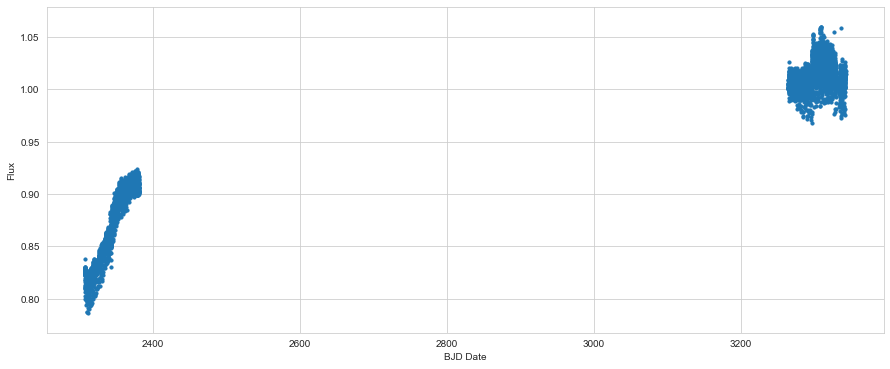

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
dates=np.concatenate((date1, date2), axis=0)
fluxes=np.concatenate((flux1, flux2), axis=0)
errs=fluxes*0.01 #we are making up an error just to run the thing...errors are not included in the file.
plt.scatter(dates,fluxes,s=10)
plt.xlabel('BJD Date')
plt.ylabel('Flux')

Ok, now we will search for periodic variability in this source. We will run three separate periodograms, each of which is useful to search for distinct light curve shapes (transits, contact binaries, and pulsational/rotational variables)...

In [8]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs,magsarefluxes=True)

[I 200723 23:34:53 zgls:600] using autofreq with 51718 frequency points, start P = 0.100, end P = 1034.451
[I 200723 23:34:53 zgls:607] using 8 workers...


In [9]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs, magsarefluxes=True)

[I 200723 23:36:21 nonphysical:219] spline fit done. nknots = 30,  chisq = 5231.85279, reduced chisq = 0.78029
[I 200723 23:36:21 png:697] plotting phased LC with period 287.347601, epoch 2311.33085
[E 200723 23:36:22 png:632] spline fit failed, trying SavGol fit
[I 200723 23:36:22 nonphysical:416] applying Savitzky-Golay filter with window length 23 and polynomial degree 2 to mag series with 6736 observations, using period 143.673801, folded at 2307.550904
[I 200723 23:36:22 nonphysical:438] SG filter applied. chisq = 17836.51069, reduced chisq = -99.00000
[I 200723 23:36:22 png:697] plotting phased LC with period 143.673801, epoch 2323.30400
[E 200723 23:36:22 png:632] spline fit failed, trying SavGol fit
[I 200723 23:36:22 nonphysical:416] applying Savitzky-Golay filter with window length 23 and polynomial degree 2 to mag series with 6736 observations, using period 574.695202, folded at 2307.550904
[I 200723 23:36:22 nonphysical:438] SG filter applied. chisq = 1424.82306, reduced ch

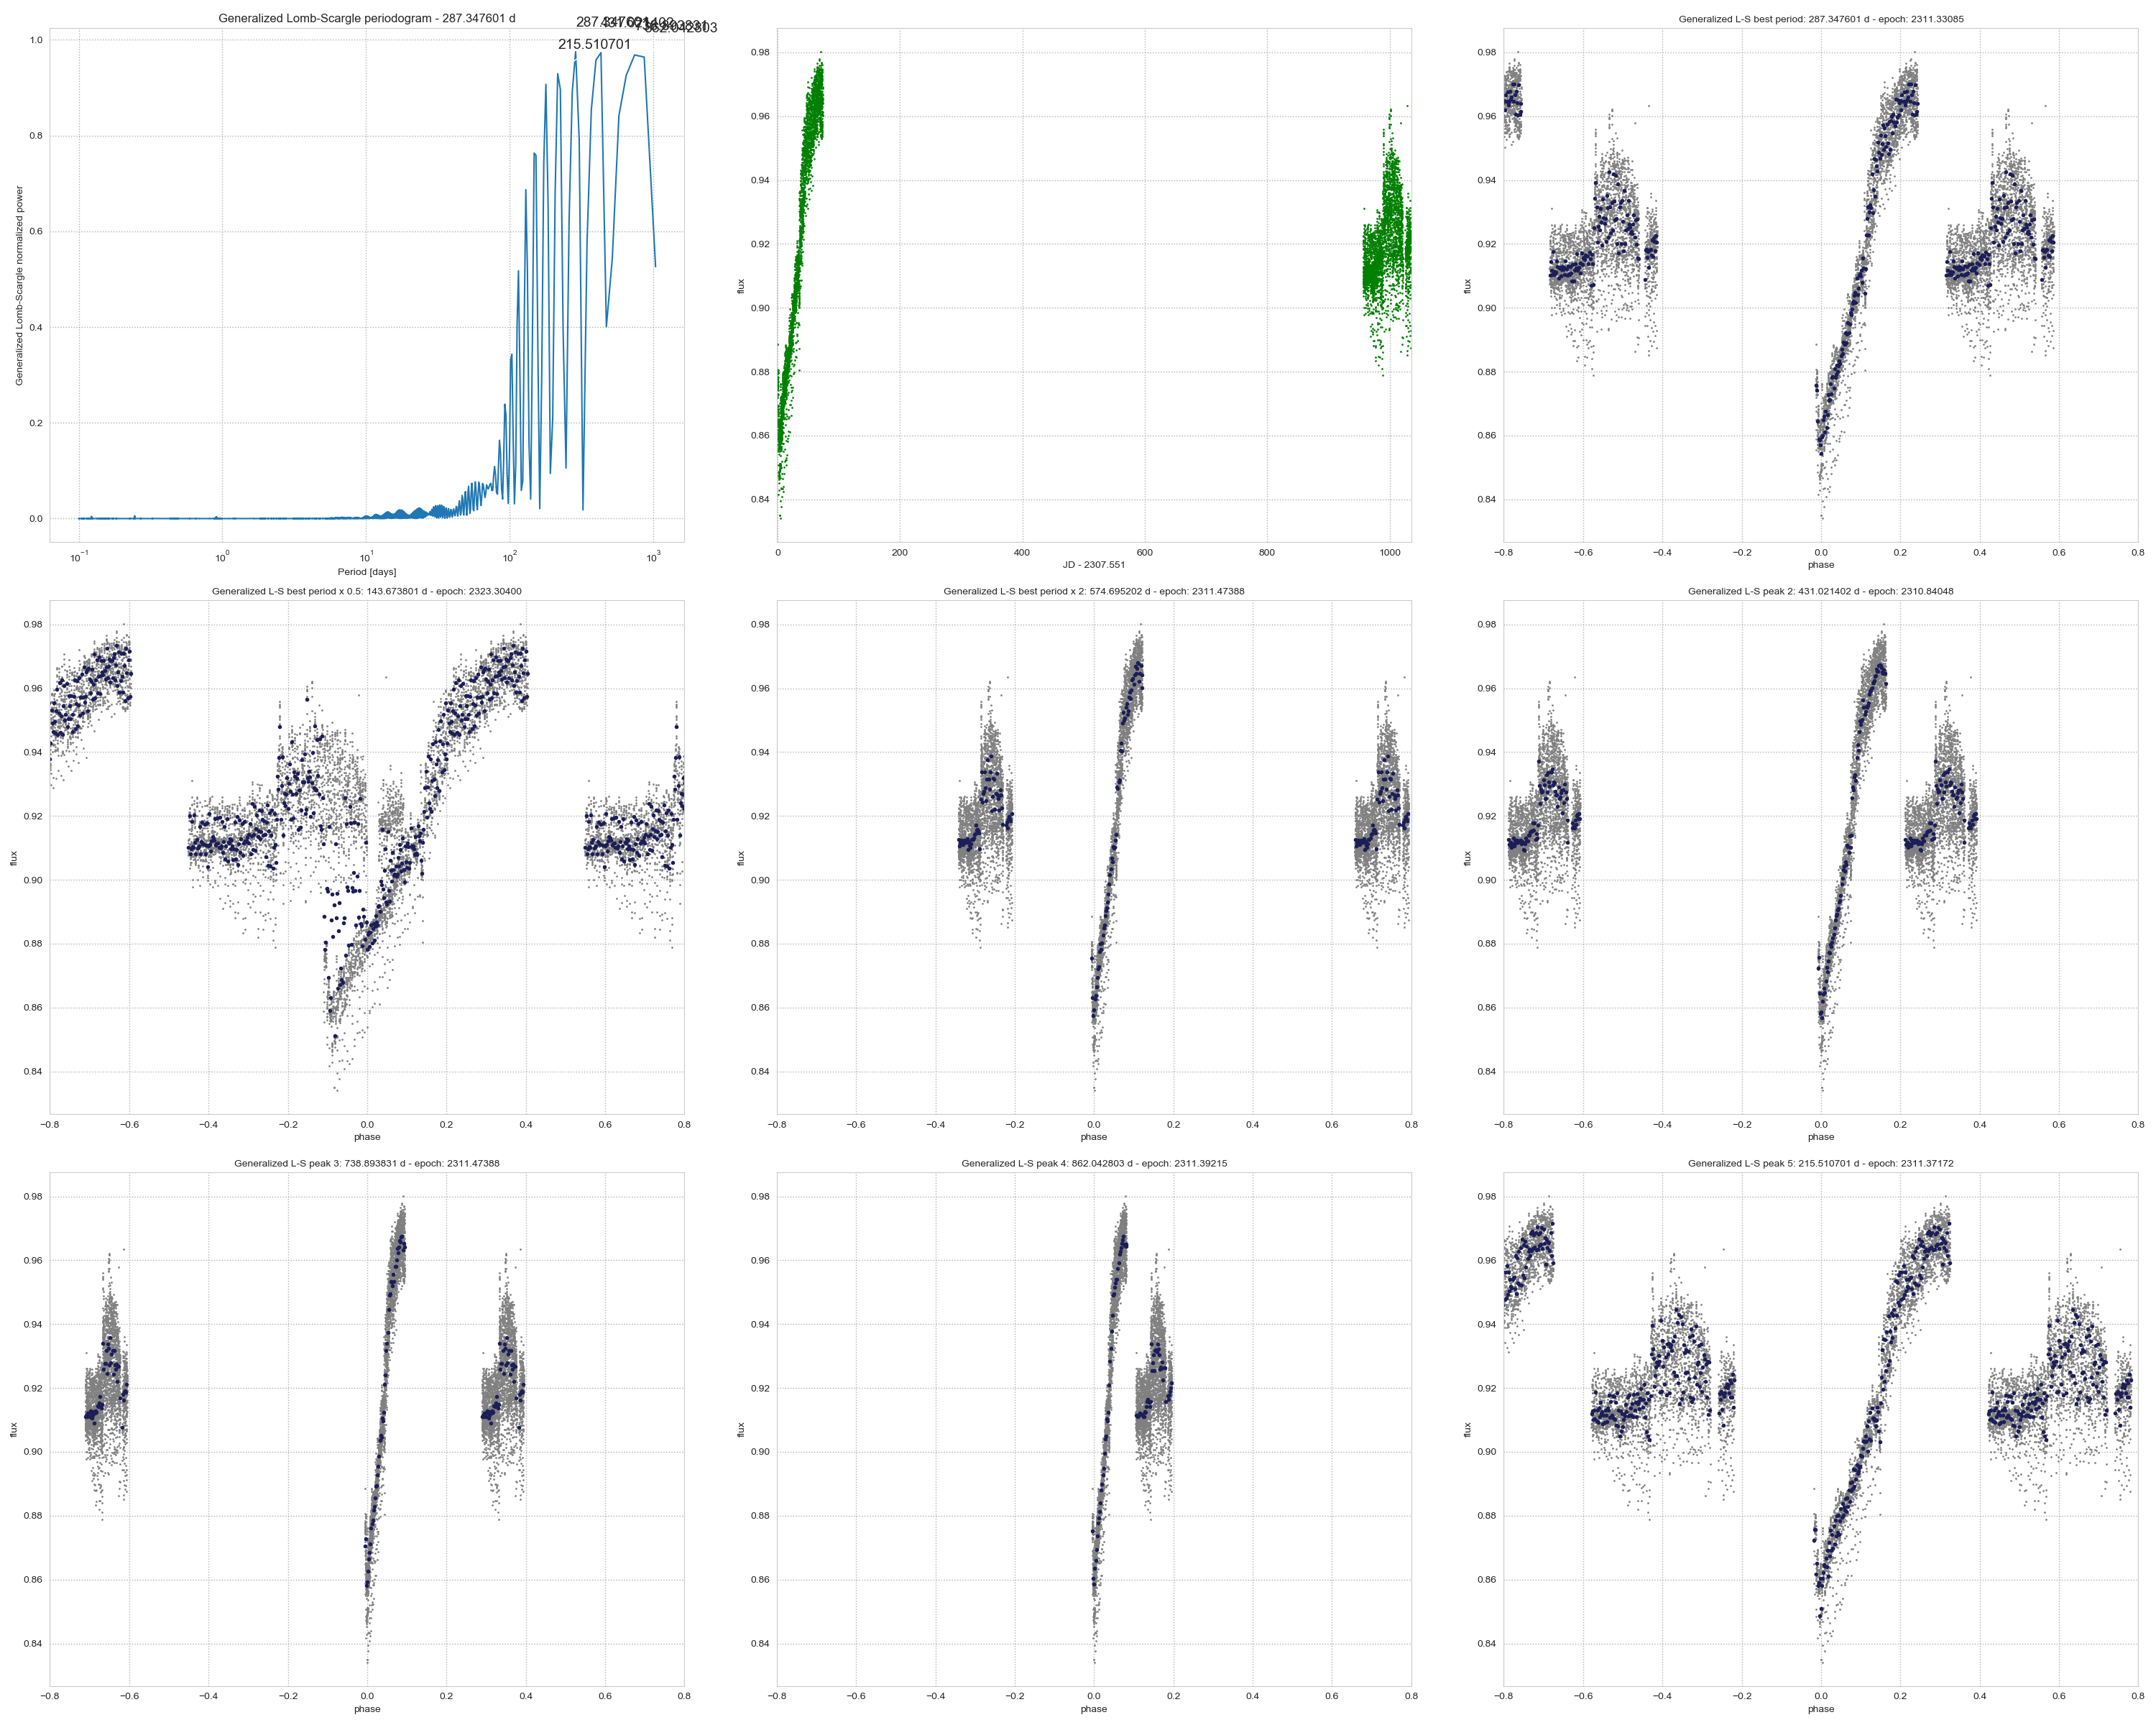

In [10]:
Image('checkplot.png')

In [12]:
glsp

{'bestperiod': 287.3476010155556,
 'bestlspval': 0.9749445484185827,
 'nbestpeaks': 5,
 'nbestlspvals': [0.9749445484185827,
  0.973084290108961,
  0.9682415344106357,
  0.9637455952980212,
  0.9291219249372953],
 'nbestperiods': [287.3476010155556,
  431.02140152333334,
  738.8938311828571,
  862.0428030466667,
  215.51070076166667],
 'lspvals': array([5.26107528e-01, 9.63745595e-01, 9.68241534e-01, ...,
        5.70102637e-06, 8.88655257e-06, 7.84445565e-06]),
 'omegas': array([6.07393013e-03, 7.28871616e-03, 8.50350218e-03, ...,
        6.28287333e+01, 6.28299481e+01, 6.28311629e+01]),
 'periods': array([1.03445136e+03, 8.62042803e+02, 7.38893831e+02, ...,
        1.00004966e-01, 1.00003032e-01, 1.00001099e-01]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [15]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [287.3476010155556, 431.02140152333334, 738.8938311828571, 862.0428030466667, 215.51070076166667] (days)


The next command takes a while to run. Maybe take a half hour snack break... 

In [16]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs,magsarefluxes=True)

[I 200723 23:38:09 abls:921] min P: 0.1, max P: 100.0, nfreq: 4133668, minfreq: 0.01, maxfreq: 10.0
[I 200723 23:38:09 abls:926] autofreq = True: using AUTOMATIC values for freq stepsize: 2.4167400110183997e-06, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[I 200723 23:38:09 abls:980] using 8 workers...
[I 200723 23:38:09 abls:1091] worker 1: minfreq = 0.010000, nfreqs = 516708
[I 200723 23:38:09 abls:1091] worker 2: minfreq = 1.258749, nfreqs = 516708
[I 200723 23:38:09 abls:1091] worker 3: minfreq = 2.507498, nfreqs = 516708
[I 200723 23:38:09 abls:1091] worker 4: minfreq = 3.756247, nfreqs = 516708
[I 200723 23:38:09 abls:1091] worker 5: minfreq = 5.004996, nfreqs = 516708
[I 200723 23:38:09 abls:1091] worker 6: minfreq = 6.253744, nfreqs = 516708
[I 200723 23:38:09 abls:1091] worker 7: minfreq = 7.502493, nfreqs = 516708
[I 200723 23:38:09 abls:1091] worker 8: minfreq = 8.751242, nfreqs = 516712
[I 200723 23:38:09 abls:1092] running...


[E 200724 00:08:37 png:632] spline fit failed, trying SavGol fit
[I 200724 00:08:37 nonphysical:416] applying Savitzky-Golay filter with window length 23 and polynomial degree 2 to mag series with 6736 observations, using period 0.102175, folded at 2307.550904
[I 200724 00:08:37 nonphysical:438] SG filter applied. chisq = 15912.51395, reduced chisq = -99.00000
[I 200724 00:08:37 png:697] plotting phased LC with period 0.102175, epoch 2310.96307
[I 200724 00:08:38 nonphysical:219] spline fit done. nknots = 30,  chisq = 43872.09743, reduced chisq = 6.54319
[I 200724 00:08:38 png:697] plotting phased LC with period 0.051088, epoch 2324.81596
[I 200724 00:08:38 nonphysical:219] spline fit done. nknots = 30,  chisq = 21205.91492, reduced chisq = 3.16270
[I 200724 00:08:38 png:697] plotting phased LC with period 0.204350, epoch 2307.59177
[E 200724 00:08:39 png:632] spline fit failed, trying SavGol fit
[I 200724 00:08:39 nonphysical:416] applying Savitzky-Golay filter with window length 23 a

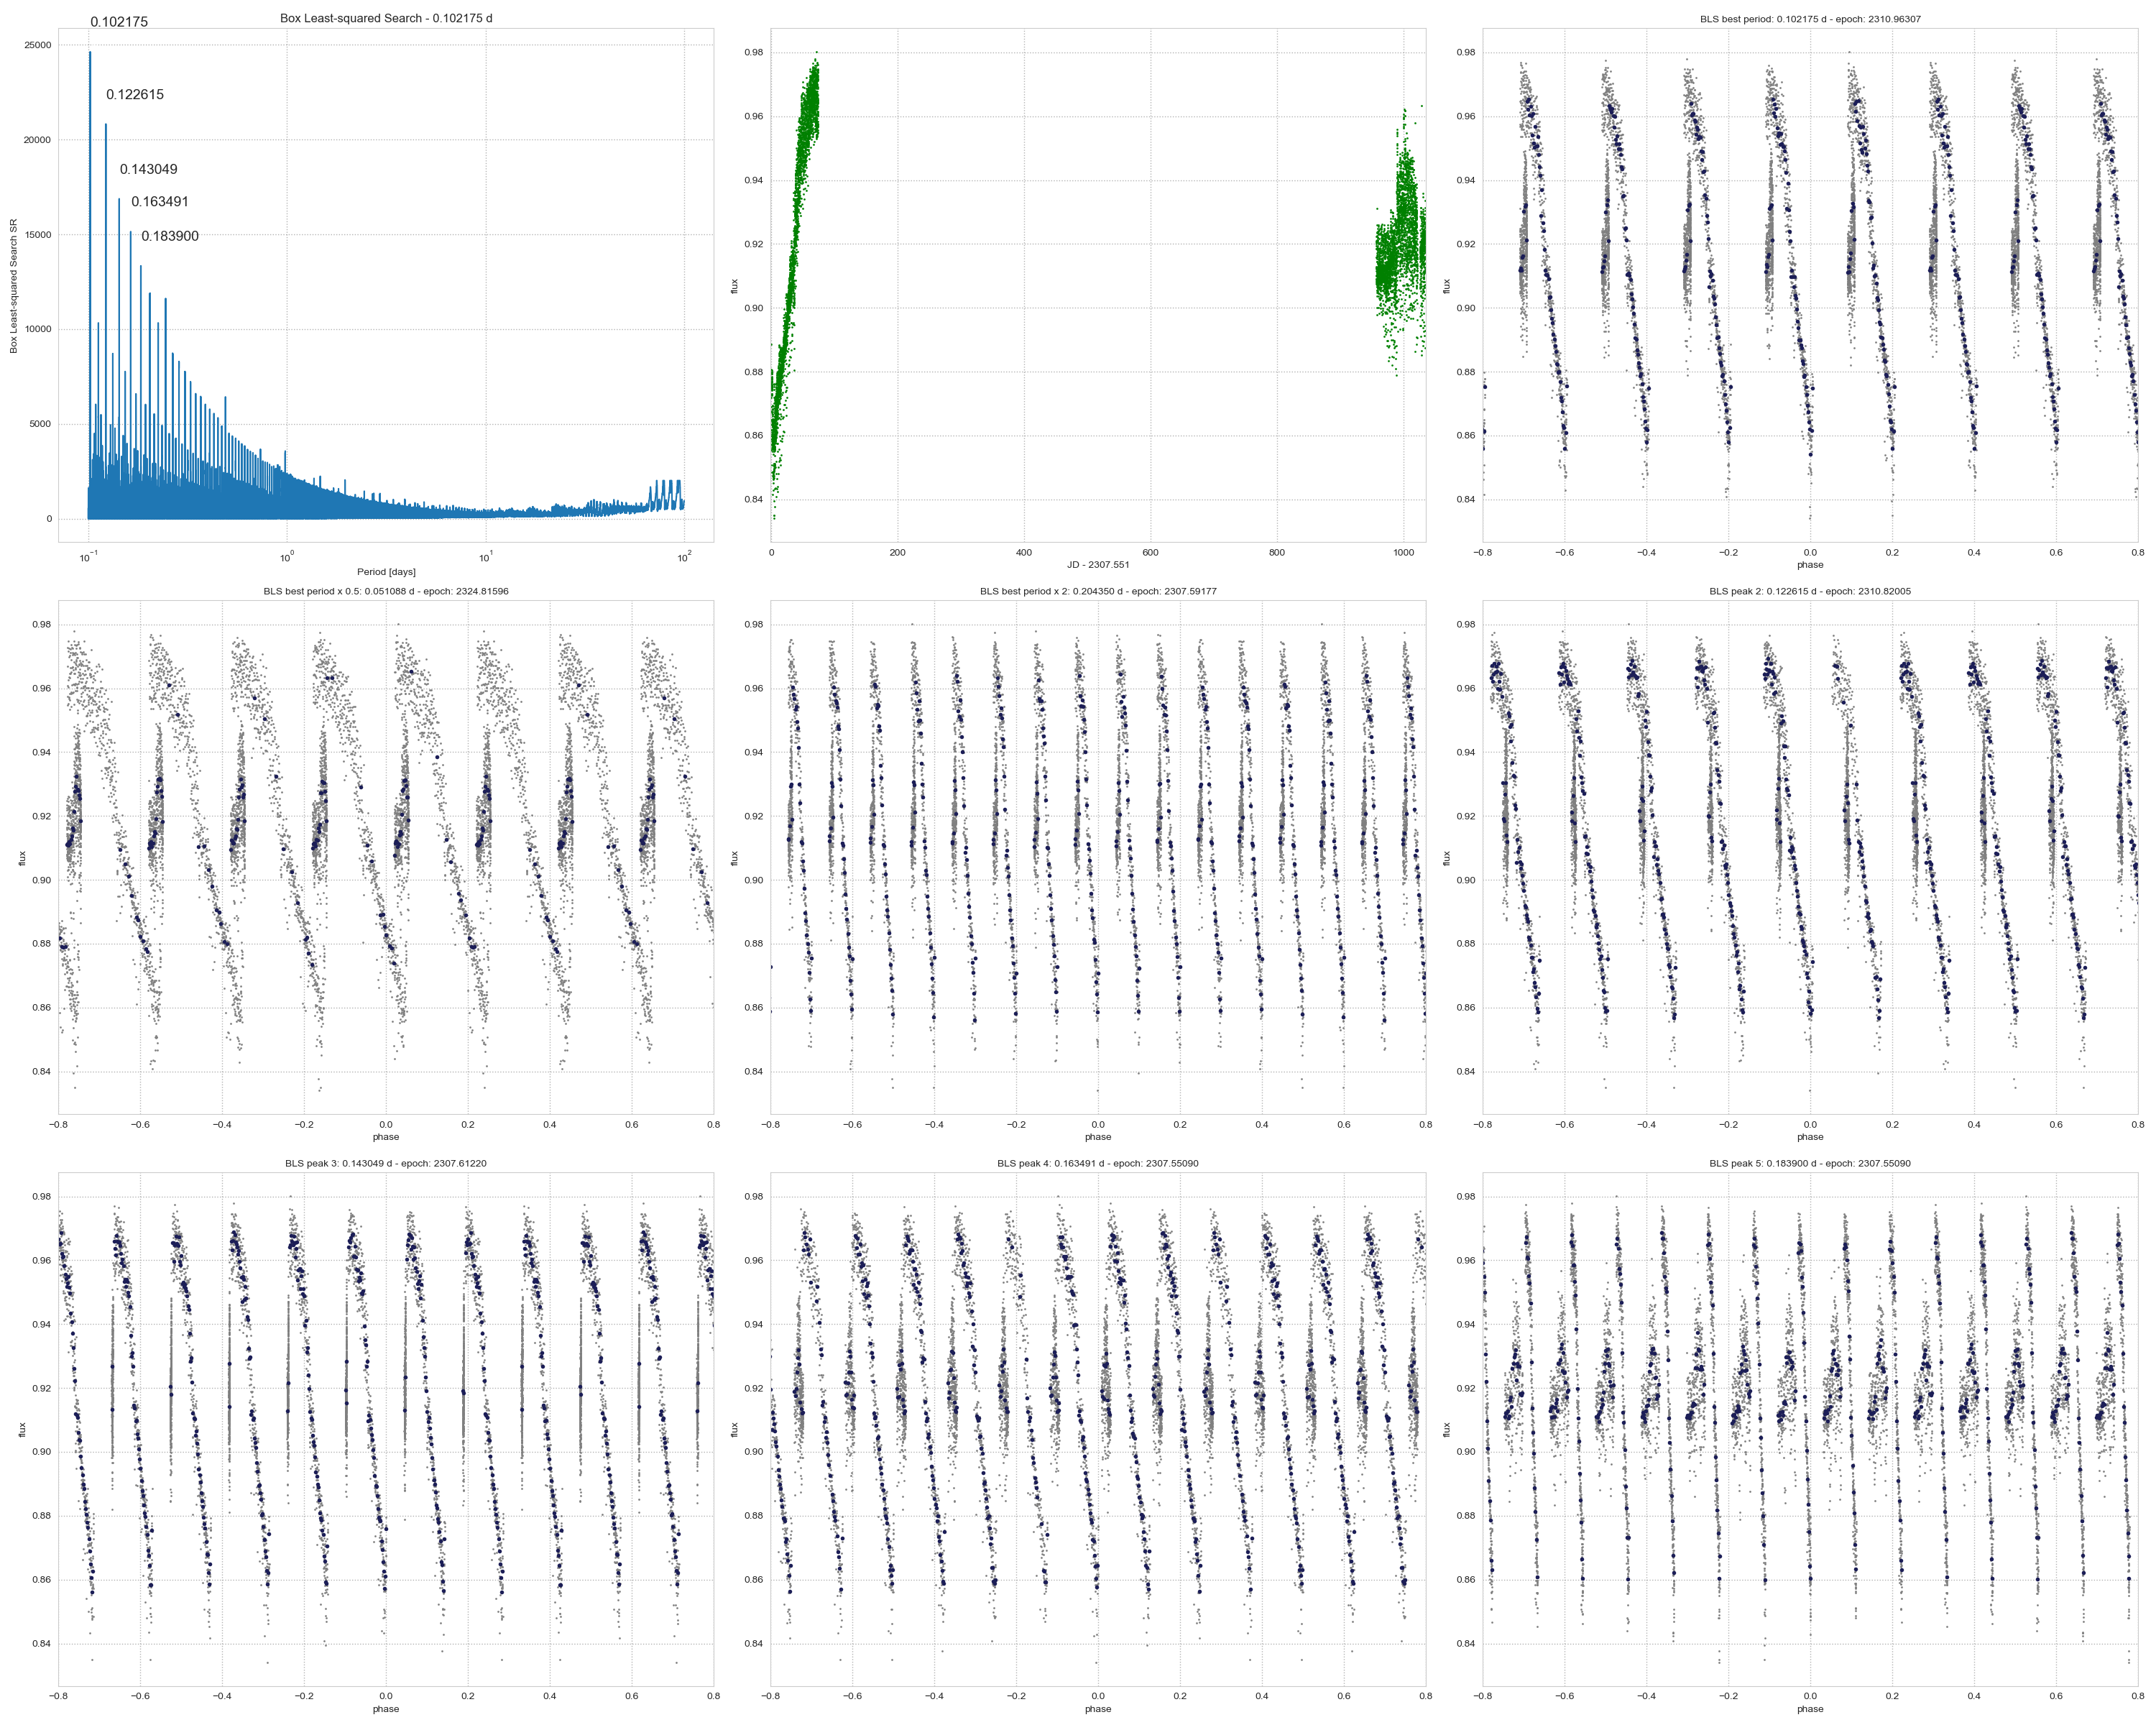

In [17]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs, magsarefluxes=True)
Image('checkplot.png')

In [27]:
print('BLS algorithm:',(glsp['nbestperiods']),'(days)')

BLS algorithm: [287.3476010155556, 431.02140152333334, 738.8938311828571, 862.0428030466667, 215.51070076166667] (days)


In [21]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs,magsarefluxes=True)

[I 200724 00:18:14 spdm:342] using autofreq with 51718 frequency points, start P = 0.100, end P = 1034.451
[I 200724 00:18:14 spdm:349] using 8 workers...


[I 200724 00:20:10 nonphysical:219] spline fit done. nknots = 30,  chisq = 5229.00437, reduced chisq = 0.77987
[I 200724 00:20:10 png:697] plotting phased LC with period 172.408561, epoch 2311.35129
[I 200724 00:20:12 nonphysical:219] spline fit done. nknots = 30,  chisq = 17946.03756, reduced chisq = 2.67652
[I 200724 00:20:12 png:697] plotting phased LC with period 86.204280, epoch 2310.37054
[E 200724 00:20:14 png:632] spline fit failed, trying SavGol fit
[I 200724 00:20:14 nonphysical:416] applying Savitzky-Golay filter with window length 23 and polynomial degree 2 to mag series with 6736 observations, using period 344.817121, folded at 2307.550904
[I 200724 00:20:14 nonphysical:438] SG filter applied. chisq = 1424.82306, reduced chisq = -99.00000
[I 200724 00:20:14 png:697] plotting phased LC with period 344.817121, epoch 2311.47388
[I 200724 00:20:16 nonphysical:219] spline fit done. nknots = 30,  chisq = 5231.49395, reduced chisq = 0.78024
[I 200724 00:20:16 png:697] plotting ph

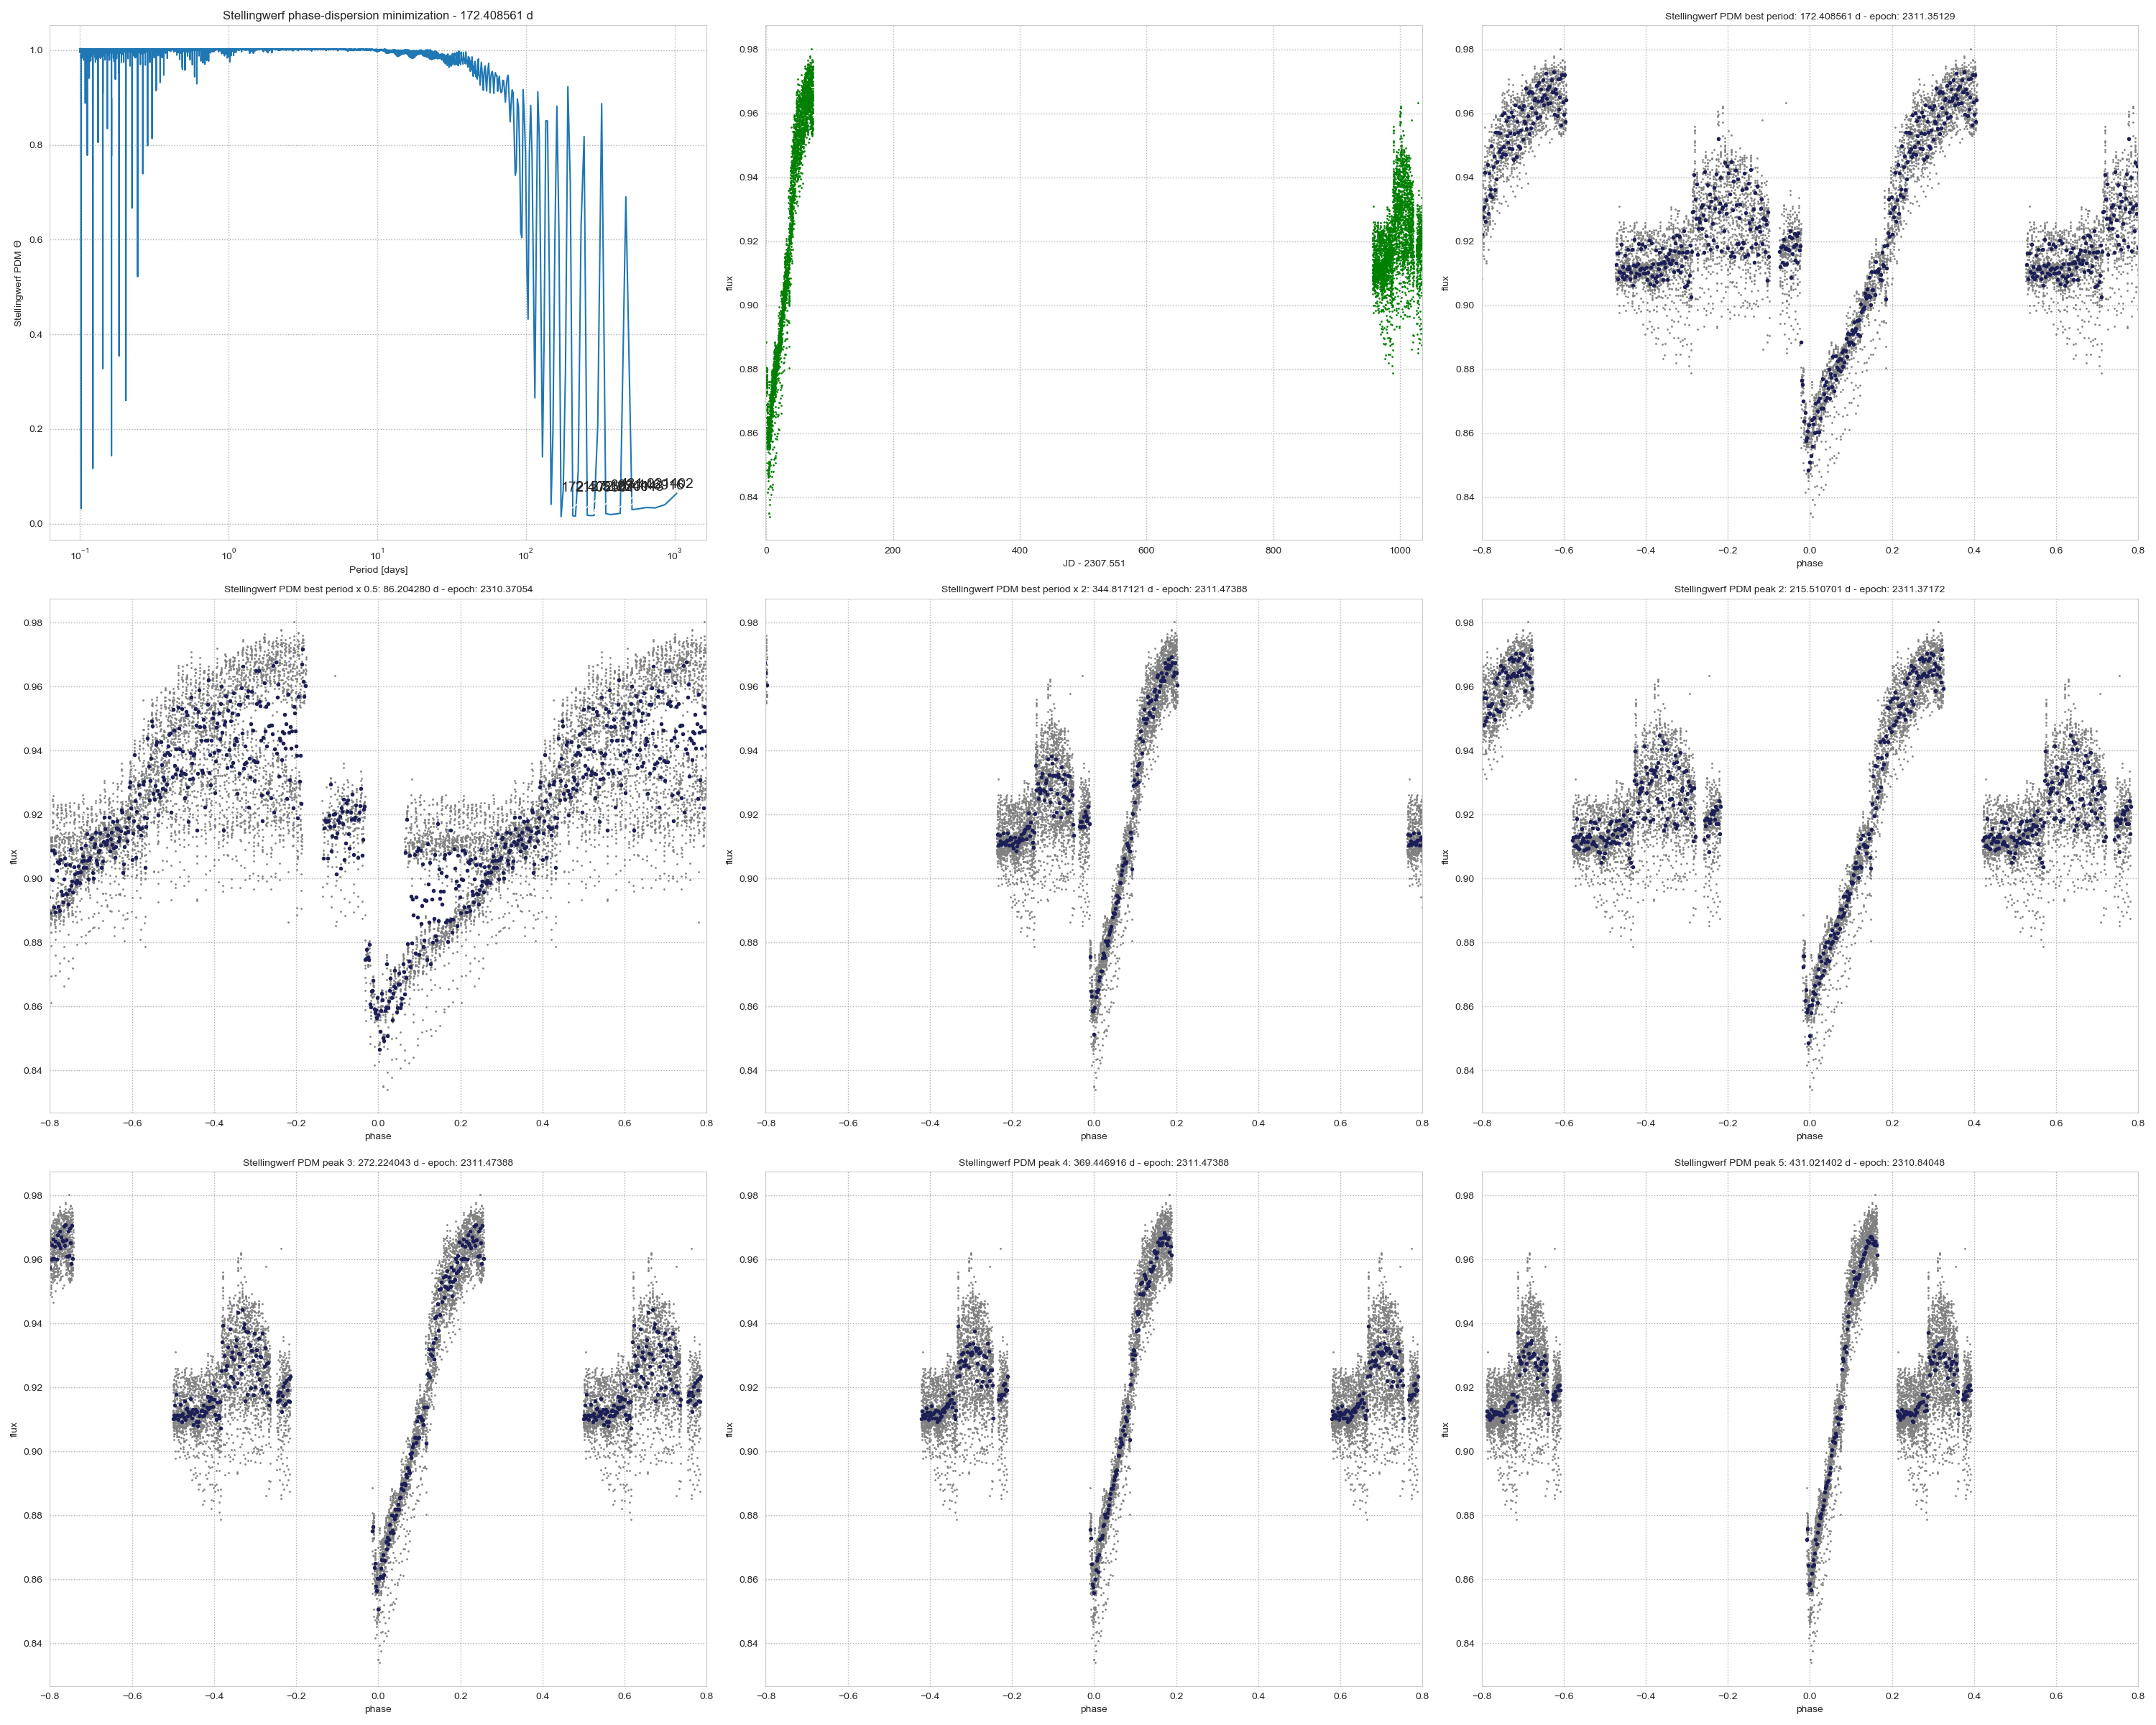

In [22]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs, magsarefluxes=True)
Image('checkplot.png')

In [23]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [172.40856060933336, 215.5107007616667, 272.2240430673684, 369.44691559142865, 431.0214015233334] (days)


Let's put all the periodograms together in one plot

In [24]:
fileout='M67_Source.pkl'
cpf = checkplot.checkplot_pickle([glsp,spdm,bls],dates,fluxes,errs,magsarefluxes=True,\
                                 outfile=fileout,objectinfo={'ra': RA,'decl': DEC})
#,minbinelems=1,

[W 200724 00:20:27 pkl:604] adding a randomly generated objectid since none was provided in objectinfo dict
[I 200724 00:20:27 pkl_utils:417] adding in object information and finder chart for 8e6d4 at RA: 132.654, DEC: 11.901
[I 200724 00:20:27 plotbase:965] fetched stamp successfully for (132.654, 11.901)
[W 200724 00:20:27 pkl_utils:765] pmRA not found in provided objectinfo dict, using value from GAIA
[W 200724 00:20:27 pkl_utils:783] pmDEC not found in provided objectinfo dict, using value from GAIA
[I 200724 00:20:27 mast:329] getting cached MAST query result for request: {'format': 'json', 'params': {'ra': 132.65420833333334, 'dec': 11.901305555555556, 'radius': 0.0013888888888888887}, 'service': 'Mast.Catalogs.Tic.Cone', 'timeout': 180.0}
[I 200724 00:20:27 pkl:679] sigclip = 4.0: before = 6736 observations, after = 6736 observations
[I 200724 00:20:29 nonphysical:219] spline fit done. nknots = 30,  chisq = 5231.85279, reduced chisq = 0.78029
[I 200724 00:20:29 pkl_utils:1711] p

[I 200724 00:20:49 pkl_png:1076] checkplot pickle -> checkplot PNG: checkplot-pickle.png OK


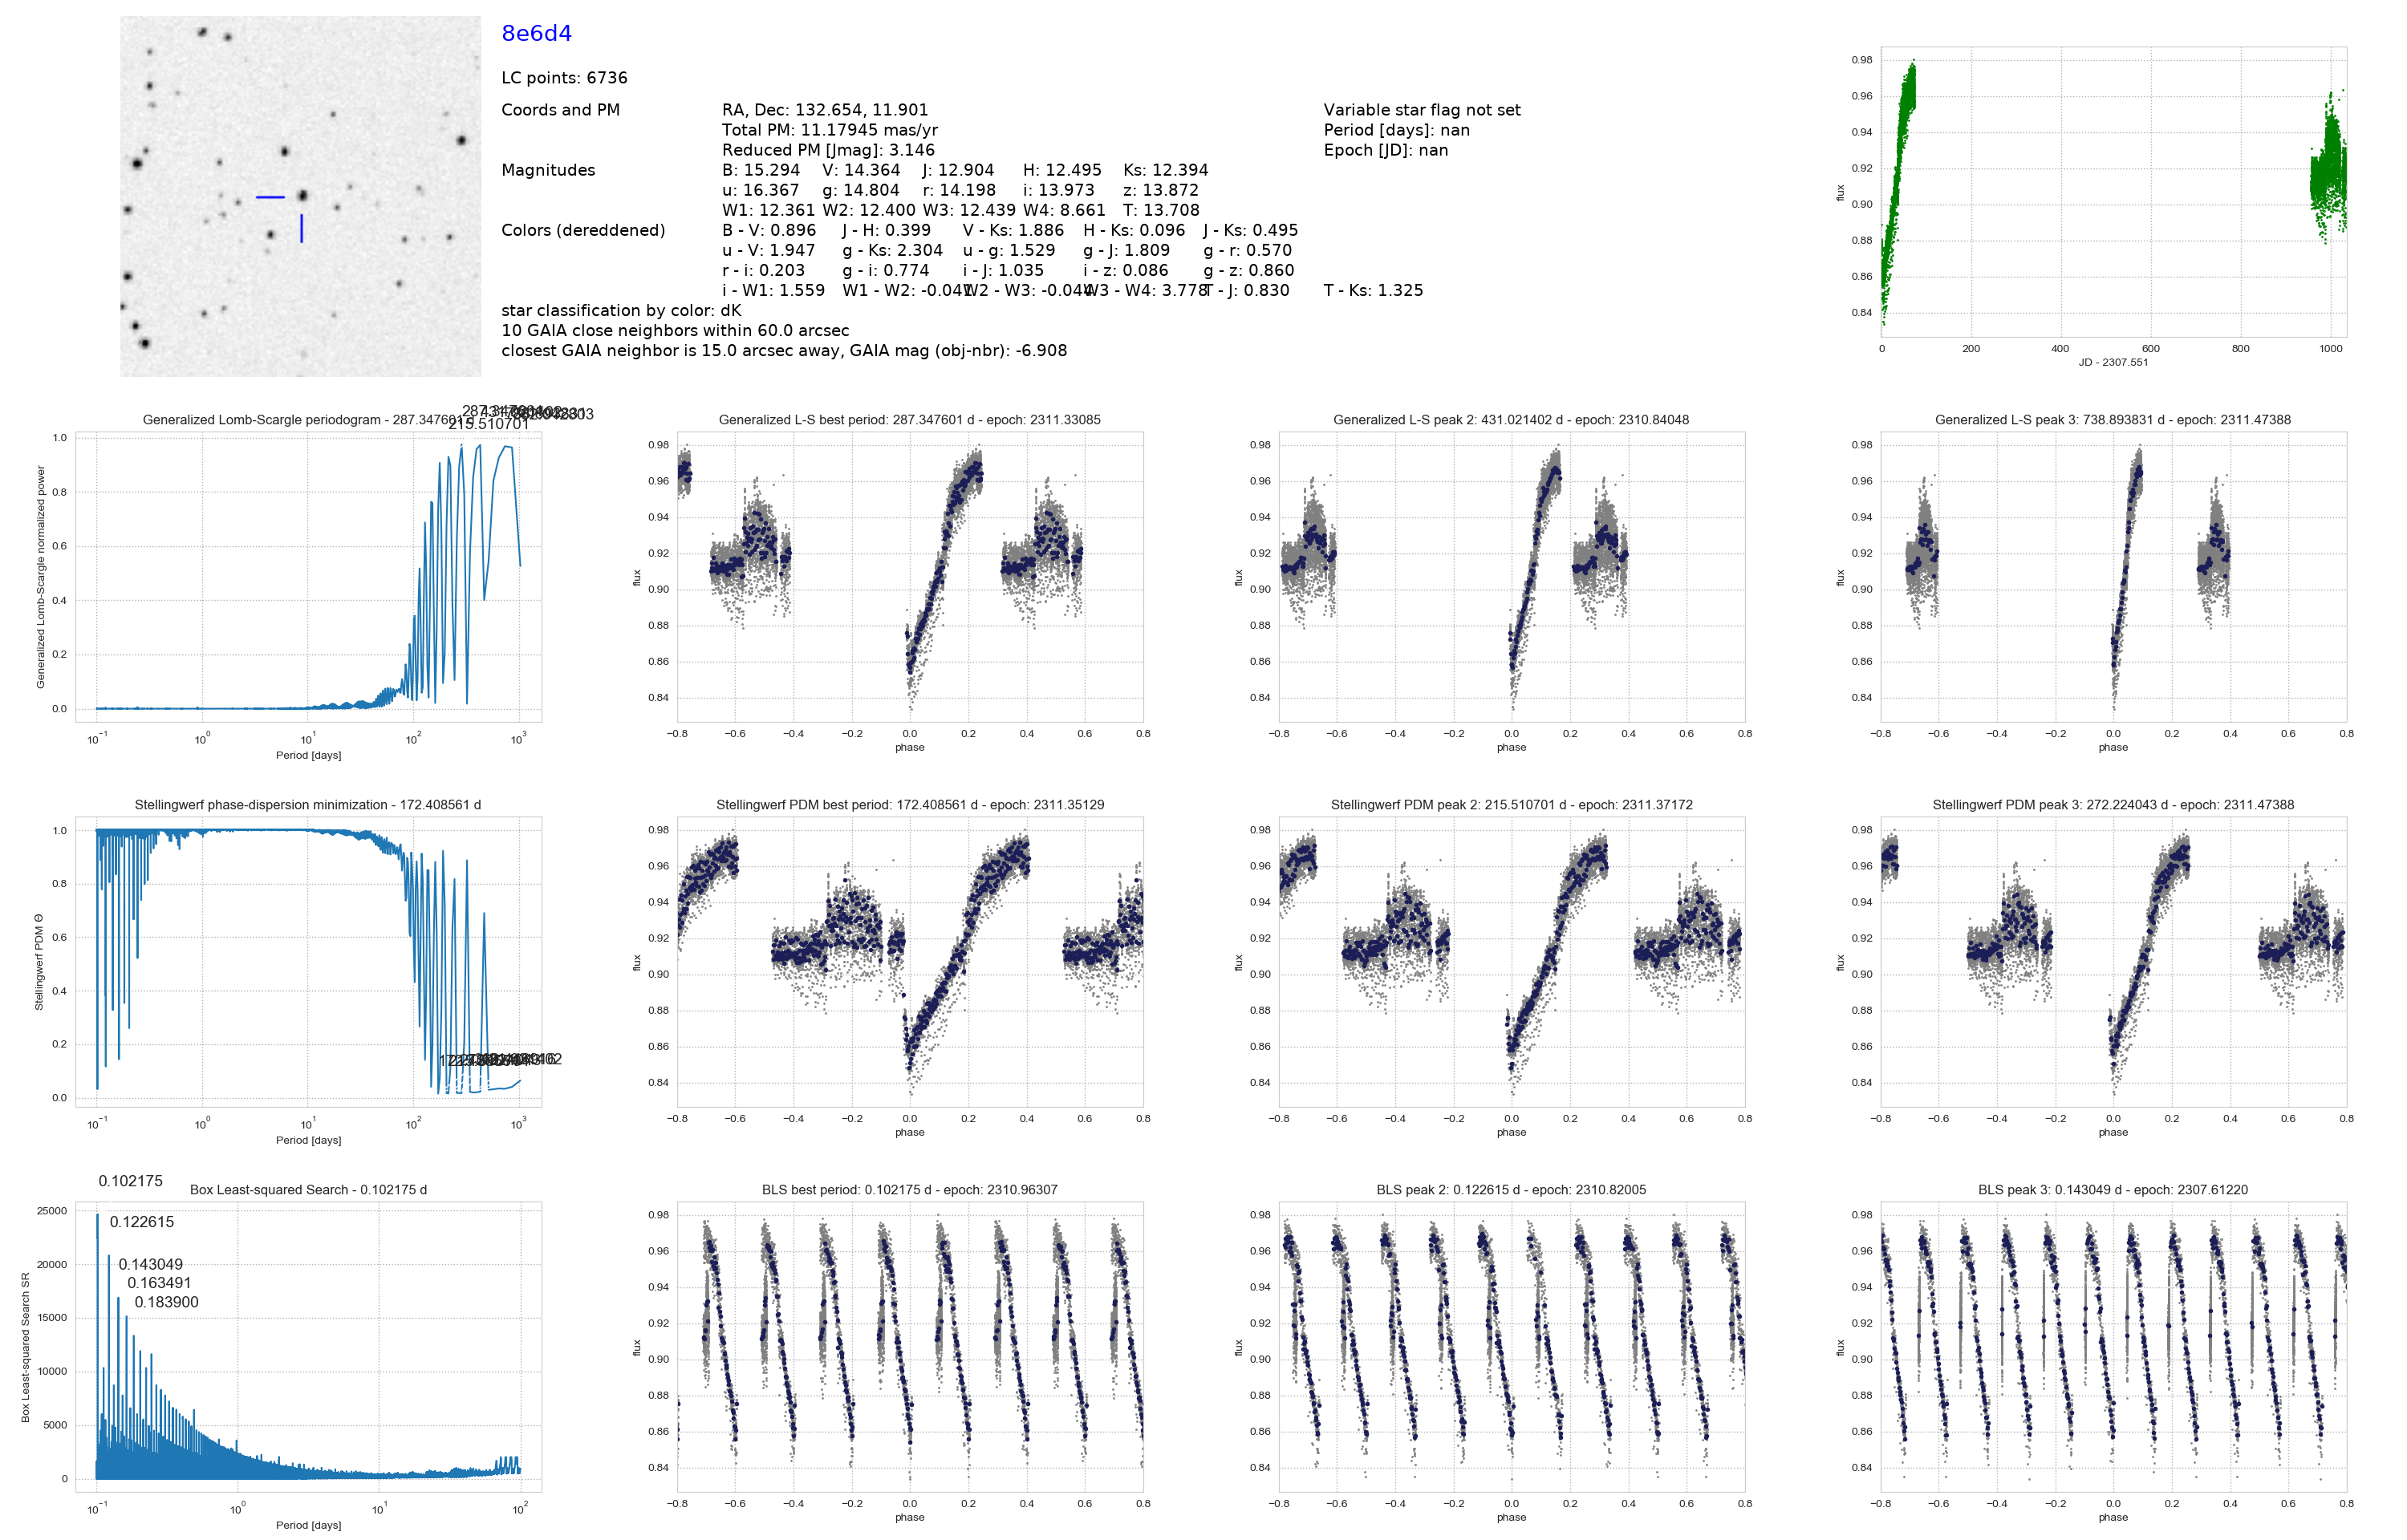

In [25]:
cpfpng = checkplot.checkplot_pickle_to_png(fileout, 'checkplot-pickle.png')
Image('checkplot-pickle.png')